In [13]:
import pandas as pd
import numpy as np
import os
import pandas._libs as pdl


#true data
root_dir = "C:/Users/zouziyuan/Desktop/python project group/HFT_Trades_PerStockDay1"

#client can change the list of time they want as an input
listofy=[0.1,0.2,0.5,1,2,5,10,20,50,100,200,500]

#read each file
for ticker in os.listdir(root_dir):
    for yrmth in os.listdir(root_dir+"/"+ ticker):
        for file in os.listdir(root_dir+"/"+ ticker+"/"+yrmth):
            if(os.path.exists('raw_file')):
                next
            else:
                raw_file=root_dir+"/"+ticker+"/"+yrmth+"/"+file
                #read csv to df
                input_df=pd.read_csv(raw_file, header=0, index_col = 0)
                #check if df is empty
                if len(input_df)==0:
                    pass
                else:
                    
                    #check if time is sorted, if not, error
                    input_df.time.astype('float64')
                    if pdl.algos.is_monotonic_float64(input_df.time.values,False)[0]:
                        pass
                    else:
                        print('Time is not sorted!error')
                        break
                    #create columns for markout
                    for q in listofy:
                        input_df[str(q)+"s"]=0
                    input_df['type']=input_df['type_demand']+input_df['type_supply']
                    del input_df['type_demand']
                    del input_df['type_supply']

                    #transfer to dictionary to save time
                    input_dic=input_df.T.to_dict()
                    
                    #def markout function
                    def markout(dic, y):
                        i=0
                        m=0    
                        while i<len(input_dic) and m<len(input_dic):
                            if input_dic[i]['time']<=input_dic[m]['time']+y:    
                                input_dic[m][str(y)+"s"]=input_dic[i]['price']
                                i=i+1
                                if i>len(input_dic)-1:
                                    while m<len(input_dic):
                                        input_dic[m][str(y)+"s"]=input_dic[i-1]['price']
                                        m=m+1
                                continue
                            else:
                                input_dic[m][str(y)+"s"]=input_dic[i-1]['price']
                                m=m+1
                        return dic
                    
                    #markout for a list
                    def markoutfinal(listinput):
                        for y in listinput:
                            markout(input_dic,y)
                    #calculate markout
                    markoutfinal(listofy)
                    
                    
                    #transfer back to dataframe
                    input_df=pd.DataFrame(input_dic).T
        
                    #adjustments on input_df to calculate real returns
                    for q in listofy:
                        input_df[str(q)+"s"]=(input_df[str(q)+"s"]-input_df['price'])*input_df['shares']*(2*(input_df.buysell=='B')-1)
                    
                
                    #total number of shares of each type and total retutn
                    input_df=input_df.groupby(['ticker','type']).sum()[['shares']+[str(x)+"s" for x in listofy]]
                    input_df=input_df.reset_index(level=['ticker', 'type'])
                
                    #combine different input
                    return_df=return_df.append(input_df, ignore_index=True)
                    
                    
                    

                
#export seperate files then combine
return_df.to_csv("df1.csv",index=False,sep=',')


0:09:18.190499


In [1]:
import pandas as pd
import numpy as np
import os
import pandas._libs as pdl


#after running all the data and get seperate outputs
#read seperate data to 1 dataframe to make calculations

root_dir1 = "C:/Users/zouziyuan/Desktop/python project group/project2/dfs/list"

raw_file1=root_dir1+"/"+'df1.csv'
raw_file2=root_dir1+"/"+'df2.csv'
raw_file3=root_dir1+"/"+'df3.csv'
raw_file4=root_dir1+"/"+'df4.csv'
raw_file5=root_dir1+"/"+'df5.csv'
raw_file6=root_dir1+"/"+'df6.csv'
raw_file7=root_dir1+"/"+'df7.csv'
raw_file8=root_dir1+"/"+'df8.csv'
raw_file9=root_dir1+"/"+'df9.csv'
raw_file10=root_dir1+"/"+'df10.csv'
raw_file11=root_dir1+"/"+'df11.csv'


input_df1=pd.read_csv(raw_file1, header=0)
input_df2=pd.read_csv(raw_file2, header=0)
input_df3=pd.read_csv(raw_file3, header=0)
input_df4=pd.read_csv(raw_file4, header=0)
input_df5=pd.read_csv(raw_file5, header=0)
input_df6=pd.read_csv(raw_file6, header=0)
input_df7=pd.read_csv(raw_file7, header=0)
input_df8=pd.read_csv(raw_file8, header=0)
input_df9=pd.read_csv(raw_file9, header=0)
input_df10=pd.read_csv(raw_file10, header=0)
input_df11=pd.read_csv(raw_file11, header=0)

return_df=pd.concat([input_df1,input_df2,input_df3,input_df4,input_df5,input_df6,input_df7,input_df8,input_df9,input_df10,input_df11],ignore_index=True)

return_df

,ticker,type,shares,0.1s,0.2s,0.5s,1s,2s,5s,10s,20s,50s,100s,200s,500s
0,AA,HH,131099.0,1.510000e+01,40.48,145.04,231.21,360.76,385.23,501.31,718.00,399.43,-356.43,190.19,-450.85
1,AA,HN,344213.0,6.677000e+01,170.00,585.99,884.21,1048.51,1373.67,1624.13,1658.96,1141.34,1171.69,2261.22,2522.29
2,AA,NH,673793.0,-1.323300e+02,-36.36,219.51,597.07,875.75,1377.10,1487.00,1957.36,2510.59,1206.26,386.25,1533.28
3,AA,NN,595606.0,5.411000e+01,143.62,574.73,822.51,1176.05,1662.88,2036.82,2083.04,2478.75,2739.96,3055.21,3545.02
4,AA,HH,99565.0,1.738000e+01,25.71,110.04,205.67,265.69,314.63,307.85,349.40,658.29,771.08,754.27,1228.17
5,AA,HN,253827.0,2.131000e+01,52.75,128.04,183.25,443.45,472.03,425.78,358.94,968.36,666.29,1632.67,-1417.00
6,AA,NH,604597.0,-7.654000e+01,-83.76,159.12,308.23,548.49,851.40,1032.86,1403.51,1559.23,1437.29,529.91,-1072.01
7,AA,NN,655376.0,3.892000e+01,44.07,202.08,590.15,1394.45,1161.82,1205.17,1206.04,1386.82,-50.34,1904.76,-3291.93
8,AA,HH,187947.0,2.298000e+01,26.46,116.51,283.32,427.96,617.77,475.02,449.92,344.68,371.27,-459.42,-1947.89
9,AA,HN,449967.0,8.156000e+01,128.72,439.17,976.88,1472.19,1985.36,2051.16,2202.72,1916.69,908.25,3055.08,4909.38


In [2]:
#120 stocks ttl markout plot dataframe
plot_df1=pd.DataFrame(columns=['type','shares','0.1s','0.2s','0.5s','1s','2s','5s','10s','20s','50s','100s','200s','500s'])

a=('HH','HN','NN','NH')
plot_df1['type']=a

plot_df1.loc[0,'shares']=sum(return_df.loc[return_df['type']=='HH',['shares']].sum(axis=1))
plot_df1.loc[1,'shares']=sum(return_df.loc[return_df['type']=='HN',['shares']].sum(axis=1))
plot_df1.loc[2,'shares']=sum(return_df.loc[return_df['type']=='NN',['shares']].sum(axis=1))
plot_df1.loc[3,'shares']=sum(return_df.loc[return_df['type']=='NH',['shares']].sum(axis=1))

for i in ('0.1s','0.2s','0.5s','1s','2s','5s','10s','20s','50s','100s','200s','500s'):
    plot_df1.loc[0,i]=sum(return_df.loc[return_df['type']=='HH',[i]].sum(axis=1))/plot_df1.loc[0,].shares
    plot_df1.loc[1,i]=sum(return_df.loc[return_df['type']=='HN',[i]].sum(axis=1))/plot_df1.loc[1,].shares
    plot_df1.loc[2,i]=sum(return_df.loc[return_df['type']=='NN',[i]].sum(axis=1))/plot_df1.loc[2,].shares
    plot_df1.loc[3,i]=sum(return_df.loc[return_df['type']=='NH',[i]].sum(axis=1))/plot_df1.loc[3,].shares


plot_df1

,type,shares,0.1s,0.2s,0.5s,1s,2s,5s,10s,20s,50s,100s,200s,500s
0,HH,1.7208e+10,0.00082966,0.00128475,0.00198481,0.00258191,0.00313703,0.00366242,0.00393967,0.00394737,0.0038398,0.00361366,0.00356236,0.00340342
1,HN,2.33629e+10,0.00106616,0.0016201,0.00260903,0.00356911,0.0044154,0.00520966,0.00562743,0.00566841,0.00531403,0.00470169,0.00434224,0.00368038
2,NN,3.04114e+10,0.00158425,0.00200464,0.00292852,0.00349988,0.00362338,0.00380499,0.00451255,0.00291608,0.000688701,0.00115996,-0.000185444,-0.000973721
3,NH,3.52961e+10,0.000315178,0.000536482,0.000854903,0.0010824,0.00127947,0.00148138,0.00156038,0.00155278,0.00123798,0.00133808,0.00087743,0.000438964


In [45]:
del plot_df1['shares']
plot_df1_trans=plot_df1.T
plot_df1_trans.columns=['HH','HN','NN','NH']
plot_df1_trans = plot_df1_trans.iloc[1:]
plot_df1_trans

,HH,HN,NN,NH
0.1s,0.00082966,0.00106616,0.00158425,0.000315178
0.2s,0.00128475,0.0016201,0.00200464,0.000536482
0.5s,0.00198481,0.00260903,0.00292852,0.000854903
1s,0.00258191,0.00356911,0.00349988,0.0010824
2s,0.00313703,0.0044154,0.00362338,0.00127947
5s,0.00366242,0.00520966,0.00380499,0.00148138
10s,0.00393967,0.00562743,0.00451255,0.00156038
20s,0.00394737,0.00566841,0.00291608,0.00155278
50s,0.0038398,0.00531403,0.000688701,0.00123798
100s,0.00361366,0.00470169,0.00115996,0.00133808


Text(0.5,1,'Markout of 120 stocks in HFT')

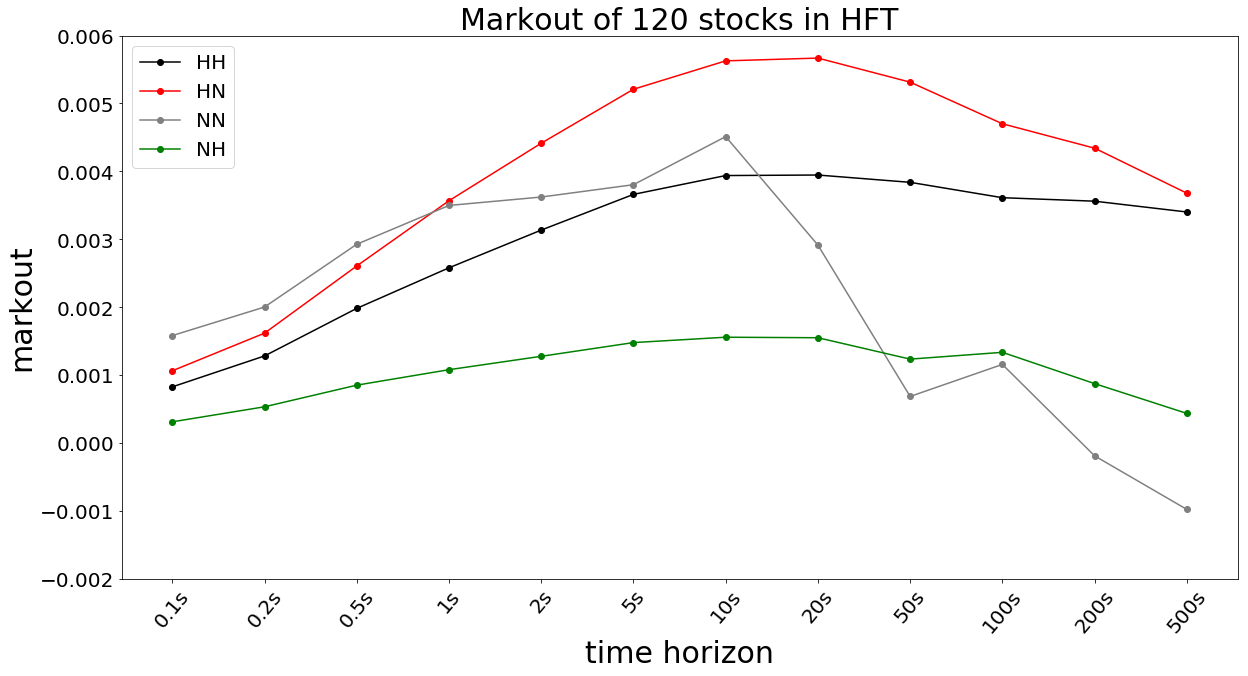

In [81]:
plt.figure(figsize=(20,10),)
plt.plot(np.arange(0,12)/12,plot_df1_trans.HH,'-o',color='black',label='HH')
plt.plot(np.arange(0,12)/12,plot_df1_trans.HN,'-o',color='red',label='HN')
plt.plot(np.arange(0,12)/12,plot_df1_trans.NN,'-o',color='grey',label='NN')
plt.plot(np.arange(0,12)/12,plot_df1_trans.NH,'-o',color='green',label='NH')

plt.ylim((-0.002,0.006))
plt.tick_params(labelsize=20)
plt.xticks(np.arange(0,12)/12, ('0.1s','0.2s','0.5s','1s','2s','5s','10s','20s','50s','100s','200s','500s'))
plt.xticks(rotation=50)
plt.xlabel('time horizon',fontsize=30)
plt.ylabel('markout',fontsize=30)
plt.legend(loc='best',fontsize=20)
plt.title('Markout of 120 stocks in HFT', fontsize=30)


#insight:
#generaly, the return of HN>HH>NH, for NN, it is more volatile，HH and HN don't have negative returns
#when a High Frequency Trader is a demander, it has a realative high and stable return,and little probability to lose.
#as time goes on, the curve reach optimum at 10s to 20s, could be a good strategy if buy and then sell at 10s.

#large drop on 20s and 50s on NN

#caused by GOOG(Google)
#on 20080930,57591, start to trade on 242.0, then continue to trade around 200 to 57600.313 at 209.51
#erroneous trade happend on that day to drop the price, settled by nasdaq later.

Text(0.5,1,'100s Markout of 40 main stocks in HFT')

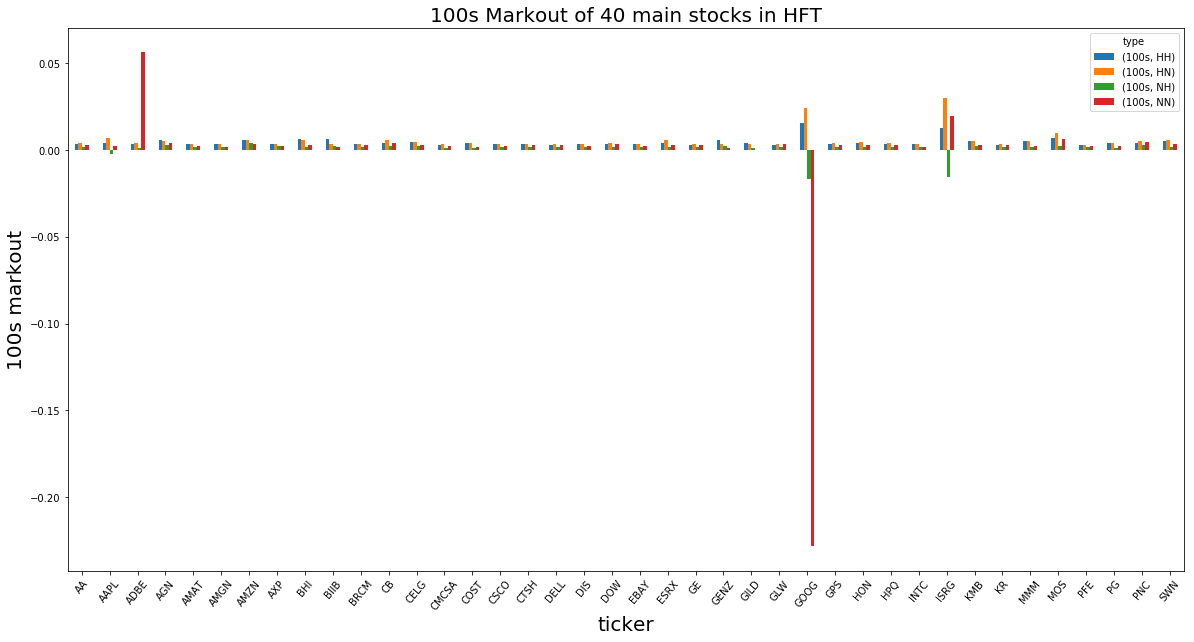

In [82]:
#100s return for 40 stocks

return_df2=return_df.loc[:,['ticker','type','shares','100s']]
return_df2=return_df2.set_index('ticker')

#got 40 stocks
return_df2=return_df2.loc[['AA','AAPL','ADBE','AGN','AMAT','AMGN','AMZN','AXP','BHI','BIIB','BRCM','CB','CELG','CMCSA','COST','CSCO','CTSH','DELL','DIS','DOW','EBAY','ESRX','GE','GENZ','GILD','GLW','GOOG','GPS','HON','HPQ','INTC','ISRG','KMB','KR','MMM','MOS','PFE','PG','PNC','SWN'],:]

#return of each ticker
return_df2=return_df2.groupby(['ticker','type']).sum()[['shares','100s']]

return_df2['100s']=return_df2['100s']/return_df2['shares']
del return_df2['shares']

pd.pivot_table(return_df2, index='ticker', columns='type', fill_value=0).plot.bar(figsize=(20,10))

plt.ylabel('100s markout')
plt.tick_params(labelsize=10)
plt.xticks(rotation=50)
plt.xlabel('ticker',fontsize=20)
plt.ylabel('100s markout',fontsize=20)
plt.legend(loc='best',fontsize=10,title='type')
plt.title('100s Markout of 40 main stocks in HFT', fontsize=20)


#insight

#GOOG(Google)
#large return on HH,HN and extremly large lost on NH,NN
#on 20080930,57591, start to trade on 242.0, then continue to trade around 200 to 57600.313 at 209.51
#erroneous trade happend on that day to drop the price, settled by nasdaq later.


#ADBE(Adobe Systems)
#large return on NN:cannot find anything related,maybe NN is not a measure that matters when analyzing the stock market?
#on 20090617 33852.56 to 33852.586,trade on 7165,about 4623 shares


Text(0.5,1,'google price change on Sep 09/30/2008')

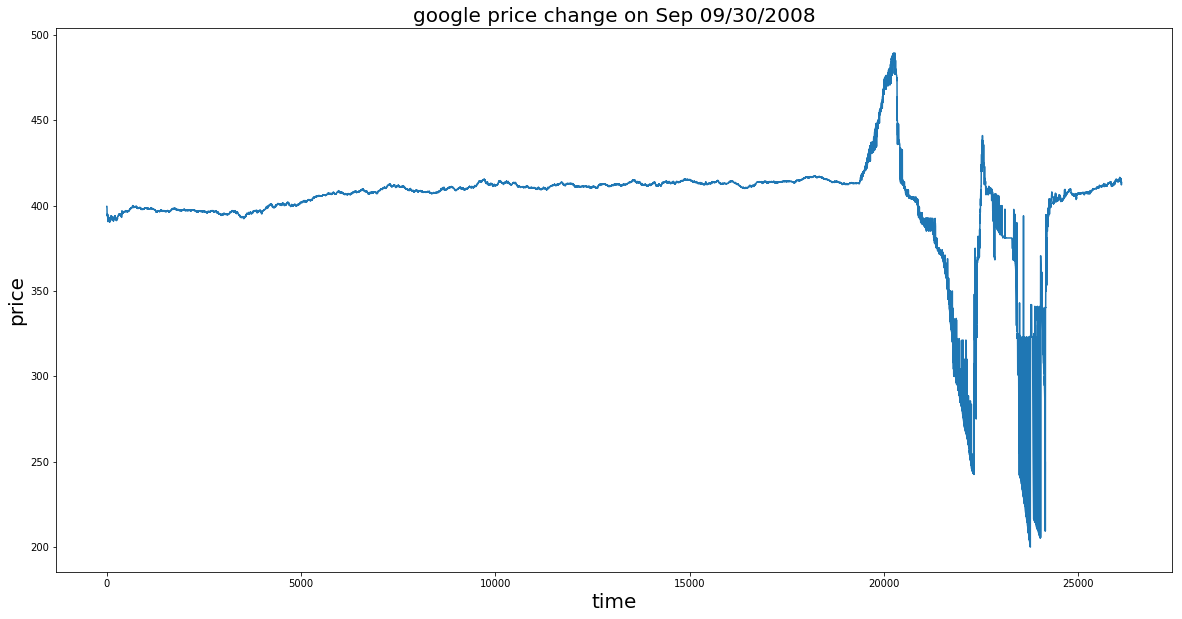

In [88]:
#google trade problem on Sep 30th,2008

googfile="C:/Users/zouziyuan/Desktop/python project group/project2/GOOG/200809/GOOG_20080930.csv"
googdf=pd.read_csv(googfile, header=0)

plt.figure(figsize=(20,10),)
plt.plot(googdf.price)

plt.xlabel('time',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.title('google price change on Sep 09/30/2008', fontsize=20)